In [1]:
from pprint import pprint

import numpy as np

from keras.datasets import imdb

max_words_in_voc = 10000 

special_tokens = {0: '<pad>', 
                  1: '<start>', 
                  2: '<oov>'}

(x_train, y_train), (x_test, y_test) = imdb.load_data(
                                          path="imdb.npz",
                                          num_words=max_words_in_voc, # maximum number of indexed word, None = all
                                          skip_top=0, # skip n words with the highest occurance count
                                          maxlen=None, # truncate examples longer then N words
                                          seed=113, # random seed
                                          start_char=1, # index to be used for <start> token
                                          oov_char=2, # index to be used for unindexed words
                                          index_from=len(special_tokens)) # add `index_from` to all inidcies for regular words

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


X:  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

Y:  1

Sentance length distribution:


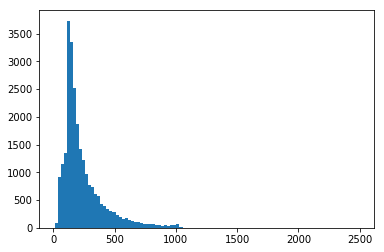

In [2]:
print("X: ", x_train[0])
print()
print("Y: ", y_train[0])
print()

%matplotlib inline
from matplotlib import pyplot as plt

print("Sentance length distribution:")
sent_lens = list(map(len, x_train))
lens = plt.hist(sent_lens, bins=100)

In [3]:
word2ind = imdb.get_word_index()

ind2word = {ind + len(special_tokens): word for word, ind in word2ind.items()} # each index is shifted by 3, as we stated in the load_imdb function
ind2word.update(special_tokens)
voc_size = min(max_words_in_voc, len(ind2word)) # maximum word index in our dataset + 

print("Vocabulary size = %d tokens" % voc_size)

def inds2text(inds_list):
    return ' '.join(map(ind2word.get, inds_list))

Vocabulary size = 10000 tokens


In [4]:
sample_sentance_inds = x_train[0]
inds2text(sample_sentance_inds)

"<start> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <oov> is an amazing actor and now the same being director <oov> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <oov> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <oov> to the two little boy's that played the <oov> of norman and paul they were just brilliant children are often left out of the <oov> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [5]:
def get_sample_batch(batch_size):
    batch_X = x_train[:batch_size]
    return batch_X

batch_X = get_sample_batch(5)
batch_lens = [len(sent_inds) for sent_inds in batch_X]
print("Example lengths: ", batch_lens)

Example lengths:  [218, 189, 141, 550, 147]


In [6]:
from keras.preprocessing import sequence

def pad_batch(batch, max_seq_len):
    batch_padded = sequence.pad_sequences(batch, 
                                          maxlen=max_seq_len, # maximum length of the example
                                          padding='post', # from which end to pad short examples
                                          truncating='post') # from which end to truncate long examples
    return batch_padded

batch_padded = pad_batch(batch_X, 100)
print("Shape of X: ", batch_padded.shape)
print()
print("Sample example: ", batch_padded[1])
print()
print("Its text: ", inds2text(batch_padded[1]))

Shape of X:  (5, 100)

Sample example:  [   1  194 1153  194 8255   78  228    5    6 1463 4369 5012  134   26
    4  715    8  118 1634   14  394   20   13  119  954  189  102    5
  207  110 3103   21   14   69  188    8   30   23    7    4  249  126
   93    4  114    9 2300 1523    5  647    4  116    9   35 8163    4
  229    9  340 1322    4  118    9    4  130 4901   19    4 1002    5
   89   29  952   46   37    4  455    9   45   43   38 1543 1905  398
    4 1649   26 6853    5  163   11 3215    2    4 1153    9  194  775
    7 8255]

Its text:  <start> big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the

In [7]:
import tensorflow as tf

tf.reset_default_graph()

In [8]:
hyper_parameters = dict()
hyper_parameters['bs'] = 5
hyper_parameters['max_len'] = 100
hyper_parameters['voc_size'] = voc_size

network_dict = dict()

In [9]:
def create_placeholders(hyper_parameters,
                        network_dict):
    network_dict['ph_X'] = tf.placeholder(shape=(hyper_parameters['bs'],
                                                 hyper_parameters['max_len']), 
                                          dtype=tf.int32, 
                                          name="text_input") # bs, max_len

create_placeholders(hyper_parameters, network_dict)

# Check that placeholder have the expected shape
print("ph_X shape:", network_dict['ph_X'].shape)

ph_X shape: (5, 100)


In [10]:
hyper_parameters['emb_size'] = 256

def create_embedding_layer(hyper_parameters, 
                           network_dict):
    var_embs = tf.get_variable('var_embs', shape=[hyper_parameters['voc_size'], 
                                                                  hyper_parameters['emb_size']],
                                               dtype=tf.float32,
                                               initializer=tf.random_uniform_initializer(-1, 1),
                                               trainable=True)
    
    
    network_dict['word_embeddings'] = \
        tf.nn.embedding_lookup(var_embs, network_dict['ph_X']) # (bs, max_len, emb_size)

create_embedding_layer(hyper_parameters, network_dict)

# Check that tensor have expected shape
print("Shape of `word_embeddings` tensor:", network_dict['word_embeddings'].shape)

Shape of `word_embeddings` tensor: (5, 100, 256)


In [11]:
hyper_parameters['cell_size'] = 512

def create_lstm_variables(hyper_parameters, network_dict):
    emb_size = hyper_parameters['emb_size']
    cell_size = hyper_parameters['cell_size']
    # Input weights + bias
    network_dict['W_i'] = tf.get_variable('W_i', 
                          shape=[emb_size + cell_size, cell_size], 
                          dtype=tf.float32,
                          initializer=tf.truncated_normal_initializer(mean=0.0, stddev=0.1))


    network_dict['b_i'] = tf.get_variable('b_i', 
                          shape=[cell_size,], 
                          dtype=tf.float32,
                          initializer=tf.zeros_initializer())

    # Forget weights + bias
    network_dict['W_f'] = tf.get_variable('W_f', 
                          shape=[emb_size + cell_size, cell_size], 
                          dtype=tf.float32,
                          initializer=tf.truncated_normal_initializer(mean=0.0, stddev=0.1))

    network_dict['b_f'] = tf.get_variable('b_f', 
                          shape=[cell_size,], 
                          dtype=tf.float32,
                          initializer=tf.zeros_initializer())
    
    # Memory weights + bias
    network_dict['W_c'] = tf.get_variable('W_c', 
                          shape=[emb_size + cell_size, cell_size], 
                          dtype=tf.float32,
                          initializer=tf.truncated_normal_initializer(mean=0.0, stddev=0.1))

    network_dict['b_c'] = tf.get_variable('b_c', 
                          shape=[cell_size, ], 
                          dtype=tf.float32,
                          initializer=tf.zeros_initializer())
    
    # Output weights + bias
    network_dict['W_o'] = tf.get_variable('W_o', 
                          shape=[emb_size + cell_size, cell_size], 
                          dtype=tf.float32,
                          initializer=tf.truncated_normal_initializer(mean=0.0, stddev=0.1))
    
    network_dict['b_o'] = tf.get_variable('b_o', 
                          shape=[cell_size,], 
                          dtype=tf.float32,
                          initializer=tf.zeros_initializer())

create_lstm_variables(hyper_parameters, network_dict)

In [12]:
def lstm_cell(word_embeddings, # (bs, embedding_size)
              h_t_1, # (bs, hidden_size)
              c_t_1, # (bs, hidden_size)
              network_dict): # (bs, hidden_size)
    W_i = network_dict['W_i']
    b_i = network_dict['b_i']
    W_o = network_dict['W_o']
    b_o = network_dict['b_o']
    W_f = network_dict['W_f']
    b_f = network_dict['b_f']
    W_c = network_dict['W_c']
    b_c = network_dict['b_c']
    concated_input = tf.concat([word_embeddings, h_t_1], axis=1) # (bs, hidden_size + embedding_size)
    forget_gate = tf.nn.sigmoid(tf.matmul(concated_input, W_f) + b_f) # (bs, hidden_size)
    input_gate = tf.nn.sigmoid(tf.matmul(concated_input, W_i) + b_i) # (bs, hidden_size)
    update = tf.nn.tanh(tf.matmul(concated_input, W_c) + b_c) # (bs, hidden_size)
    output_gate = tf.nn.sigmoid(tf.matmul(concated_input, W_o) + b_o) # (bs, hidden_size)
    c_t = c_t_1 * forget_gate + (update * input_gate) # (bs, hidden_size)
    h_t = tf.nn.tanh(c_t) * output_gate # (bs, hidden_size)
    return h_t, c_t # (bs, hidden_size), (bs, hidden_size)

In [13]:
def create_lstm(hyper_parameters, network_dict):
    word_embeddings = network_dict['word_embeddings'] # (batch_size, max_len, embedding_size)
    outputs = []
    # create special constant for first timestep cell state
    zero_state = tf.zeros(shape=(hyper_parameters['bs'], hyper_parameters['cell_size']))
    c_t = zero_state
    h_t = zero_state
    # iterate over each word
    for timestep in range(hyper_parameters['max_len']):
        # get a slice for t-th word of each batch
        one_word_batch = word_embeddings[:, timestep, :]  # (bs, embedding_size)
        # compute lstm_cell
        h_t, c_t = lstm_cell(one_word_batch, h_t, c_t, network_dict)
        # remember the output for each step
        outputs.append(h_t)
    network_dict['lstm_outputs'] = outputs # list of size `max_len` of tensors (bs, hidden_size)
    
create_lstm(hyper_parameters, network_dict)

In [14]:
lstm_outputs = network_dict['lstm_outputs']
print("len(lstm_outputs): ", len(lstm_outputs))
print("stm_outputs[0].shape: ", lstm_outputs[0].shape)

len(lstm_outputs):  100
stm_outputs[0].shape:  (5, 512)


In [15]:
def create_loss_function(hyper_parameters, network_dict):
    lstm_outputs = network_dict['lstm_outputs'] # list of size `max_len` of tensors (bs, hidden_size)
    input_words_inds = network_dict['ph_X'] # (batch_size, max_example_len)
    
    input_words = input_words_inds[:, 1:] # shift all input words left by 1
    # and add <pad> token index (1) at the end each example
    ones_vector = tf.ones(shape=[hyper_parameters['bs'],1], dtype=tf.int32)
    target_words =  tf.concat([input_words, ones_vector], axis = 1) # (bs, max_len)
    
    W = tf.get_variable('W_softmax', # softmax layer weights
                      shape=[hyper_parameters['cell_size'], hyper_parameters['voc_size']], 
                      dtype=tf.float32,
                      initializer=tf.truncated_normal_initializer(mean=0.0, stddev=0.1))
    b = tf.get_variable('b_softmax', # softmax layer bias
                        shape=[hyper_parameters['voc_size'],], 
                        dtype=tf.float32,
                        initializer=tf.truncated_normal_initializer(mean=0.0, stddev=0.1))
    
    loss = tf.constant(0.0, dtype=tf.float32)
    for t in range(hyper_parameters['max_len']):
        logits = tf.matmul(lstm_outputs[t], W) + b # (bs, voc_size)
        softmax_loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, 
                                                                      labels=target_words[:, t]) # (bs,)
        loss_t = tf.reduce_mean(softmax_loss) # batch_size, max_example_len
        loss += loss_t
    network_dict['loss'] = loss 

create_loss_function(hyper_parameters, network_dict)

In [16]:
hyper_parameters['lr'] = 0.001 # learning rate

def create_training_operation(hyper_parameters, network_dict):
    optimizer = tf.train.AdamOptimizer(learning_rate=hyper_parameters['lr'])
    # some other options:
    # optimizer = tf.train.GradientDescentOptimizer(learning_rate=hyper_parameters['lr'])
    # optimizer = tf.train.MomentumOptimizer(learning_rate=hyper_parameters['lr'], momentum=0.9)
    network_dict['train_op'] = optimizer.minimize(network_dict['loss'])

In [17]:
def create_network(hyper_parameters):
    tf.reset_default_graph()
    network_dict = dict()
    create_placeholders(hyper_parameters, network_dict)
    create_embedding_layer(hyper_parameters, network_dict)
    create_lstm_variables(hyper_parameters, network_dict)
    create_lstm(hyper_parameters, network_dict)
    create_loss_function(hyper_parameters, network_dict)
    create_training_operation(hyper_parameters, network_dict)
    return network_dict

def describe_graph():
    print("Trainable variables:")
    for var in tf.trainable_variables():
        print(var.name, ':',  var.shape)
    print()
    total_parameters = np.sum([np.prod(var.shape.as_list()) for var in tf.trainable_variables()])
    print("Total parameter count:", total_parameters)

In [18]:
hyper_parameters = {'bs': 5, 
                    'voc_size': voc_size,
                    'cell_size': 512, 
                    'emb_size': 256, 
                    'max_len': 100, 
                    'lr': 0.001}

network_dict = create_network(hyper_parameters)
describe_graph()

Trainable variables:
var_embs:0 : (10000, 256)
W_i:0 : (768, 512)
b_i:0 : (512,)
W_f:0 : (768, 512)
b_f:0 : (512,)
W_c:0 : (768, 512)
b_c:0 : (512,)
W_o:0 : (768, 512)
b_o:0 : (512,)
W_softmax:0 : (512, 10000)
b_softmax:0 : (10000,)

Total parameter count: 9264912


In [19]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

def train_step(network_dict, input_batch, tf_session, do_backward=True):
    loss = network_dict['loss']
    ph_X = network_dict['ph_X']
    if do_backward:
        train_op = network_dict['train_op']
        _, loss_value = tf_session.run([train_op, loss], feed_dict={ph_X: input_batch})
    else:
        loss_value = sess.run(loss, feed_dict={ph_X: input_batch})
    return loss_value

In [20]:
import time

batch = get_sample_batch(hyper_parameters['bs'])
batch_padded = pad_batch(batch, hyper_parameters['max_len'])

t0 = time.time()
loss_value = train_step(network_dict, batch_padded, sess, do_backward=False)
print("Forward pass took %.2f seconds" % float(time.time() - t0))
print("Loss = %f" % loss_value)
print()

t0 = time.time()
loss_value = train_step(network_dict, batch_padded, sess, do_backward=True)
print("One forward-backward pass took %.2f seconds" % float(time.time() - t0))
print("Loss = %f" % loss_value)
sess.close()

Forward pass took 1.83 seconds
Loss = 930.821716

One forward-backward pass took 12.77 seconds
Loss = 930.821716
